In [1]:
##python3 -m pip install -U matplotlib
import csv
import matplotlib.pyplot as pyplot
import seaborn as sns
from collections import Counter
import pandas as pd
from operator import itemgetter
from matplotlib.collections import BrokenBarHCollection


In [2]:
x = 0
y = 0
z = 0
q = 0

genes = {}
with open("/Users/pranjal/Desktop/Programming/GenomePlot/Drosophila/Drosophila/All Data/CRM_raw.txt")as f:
  data = csv.reader(f)
  next(data)
  
  for row in data:
          if len(row)>5:
                  if row[0].split("_")[0].lower() == "unspecified":
                      x = x+1
                  else:
                      y = y+1
                      genename = row[0].split("_")[0]
                      if genename in genes:
                          genes[genename] = genes[genename] + 1
                      elif genename not in genes:
                          genes[genename] = 1

In [3]:
ll = 0
same = []
notsame = []
similar = [[],[],[],[],[],[],[]]
checker = []
others= [[],[],[],[],[],[],[]]
with open("/Users/pranjal/Desktop/Programming/GenomePlot/Drosophila/Drosophila/All Data/Final Clean Data for Genes.csv")as a:
  data = csv.reader(a)
  next(data)
  for line in data:
      ll = ll+1
      lineclear = list(filter(None, line))
##      if (lineclear[2],lineclear[3], lineclear[4]) in checher:
##              z = z +1
##              continue
##      else:
##              checker.append((lineclear[2],lineclear[3], lineclear[4]))
      if lineclear[0] in genes.keys():
          q = q+1
          same.append(lineclear[0])
          start = int(lineclear[3])
          stop = int(lineclear[4])
          width = stop - start
          if lineclear[2] == "X":
              if start >= 21542271:
                      start = start+ 50000
              similar[0].append((start, width))
          elif lineclear[2] == "2L":
              similar[1].append((start, width))
          elif lineclear[2] == "2R":
              start = start+23513712+30000
              similar[1].append((start, width))
          elif lineclear[2] == "3L":
              similar[2].append((start, width))
          elif lineclear[2] == "3R":
              start = start+28110227+100000
              similar[2].append((start, width))
          elif lineclear[2] == "4":
              start = start+100000
              similar[3].append((start, width))
          elif lineclear[2] == "Y":
              similar[4].append((start, width))
      else:
          #same.append(lineclear[0])
          notsame.append(lineclear[0])
          start = int(lineclear[3])
          stop = int(lineclear[4])
          width = stop - start
          if lineclear[2] == "X":
              if start >= 21542271:
                      start = start+ 50000
              others[0].append((start, width))
          elif lineclear[2] == "2L":
              others[1].append((start, width))
          elif lineclear[2] == "2R":
              start = start+23513712+30000
              others[1].append((start, width))
          elif lineclear[2] == "3L":
              others[2].append((start, width))
          elif lineclear[2] == "3R":
              start = start+28110227+100000
              others[2].append((start, width))
          elif lineclear[2] == "4":
              start = start+100000
              others[3].append((start, width))
          elif lineclear[2] == "Y":
              others[4].append((start, width))


In [4]:
#This gives us top max N values
##N = 30        
##res = dict(sorted(genes.items(), key = itemgetter(1), reverse = True)[:N])
##print (res)

#If these two counts were equal, it meant all genes with CRMS had a match in the  all genes file, a sanity check
print (q)
print (len(genes))
print(ll)
print(len(same))
labeler = ["X", "2L", "2R", "3L", "3R", "4"]#, "Y"]



#This told us the differences between the commonalities we found and all the genes that had CRM's
##print (genes)
##keys = []
##for i in genes.keys():
##    keys.append(i)
##differences = set(keys) - set(same)
##print (differences)

1648
1648
17500
1648


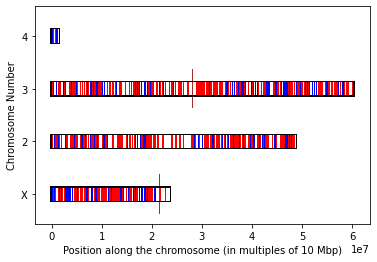

In [11]:
fig = pyplot.figure()
ax = fig.add_subplot(111)

yticklabels = []
yticks = []
yranges = [[20,5],[40,5],[60,5], [80,5],[100,5], [120,5], [140,5]]
beginner = (-250000,250000)
edge = [(23542271+50000,250000), (23513712+30000+25286936,250000),(28110227+100000+32079331,250000),(1348131+100000,250000), (367352,250000)]
lengths = [(0,23542271+50000), (0,23513712+30000+25286936), (0,28110227+100000+32079331),(0,1348131+100000),(0,367352)]
bottoms = [19.5, 39.5, 59.5, 79.5, 99.5, 119.5, 139.5]
tops = [25,45,65,85,105,125,145]

for i in range(0,4):
    coll = BrokenBarHCollection(similar[i], yranges[i], facecolor="blue", zorder= 1)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(coll)
for i in range(0,4):
    coll = BrokenBarHCollection(others[i], yranges[i], facecolor="red", zorder = 0.75)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(coll)

widthbox = 0.5
heightbox = 6

for i in range(0,4):
    col2 = BrokenBarHCollection([lengths[i]], [bottoms[i],widthbox], facecolor="black")
    col3 = BrokenBarHCollection([lengths[i]], [tops[i],widthbox], facecolor="black")
    col4 = BrokenBarHCollection([beginner,edge[i]], [bottoms[i],heightbox], facecolor="black")
    center = bottoms[i]+3
    yticks.append(center)
    ax.add_collection(col2)
    ax.add_collection(col3)
    ax.add_collection(col4)
labeler2 = ["X", "2", "3", "4"]#, "Y"]
for a in labeler2:
    yticklabels.append(a)

col23 = BrokenBarHCollection([(21542271,50000)], [15,15], facecolor="brown", zorder = 0.5)
col24 = BrokenBarHCollection([(0,100000)], [75,15], facecolor="brown", zorder = 0.5)
col11 = BrokenBarHCollection([(23513712,30000)], [35,15], facecolor="brown", zorder = 0.5)
col22 = BrokenBarHCollection([(28110227,100000)], [55,15], facecolor="brown", zorder = 0.5)
ax.add_collection(col11)
ax.add_collection(col23)
ax.add_collection(col24)
ax.add_collection(col22)


ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.axis('tight')
pyplot.ylabel("Chromosome Number")
pyplot.xlabel("Position along the chromosome (in multiples of 10 Mbp)")
pyplot.savefig('/Users/pranjal/Desktop/Programming/Genomeplot/C. Elegans/C. Elegans/C. Elegans.pdf') 
pyplot.savefig('/Users/pranjal/Desktop/Programming/GenomePlot/Drosophila/Drosophila/Drosophila.pdf') 
pyplot.show()